# matplotlib

Есть несколько пакетов для построения графиков. Один из наиболее популярных - `matplotlib`. Если в `jupyter notebook` выполнить специальную `ipython` команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков - тогда их можно вертеть мышкой (в случае inline графиков это невозможно). Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`; конечно, растровые форматы годятся только для размещения графиков на web-страницах). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

In [1]:
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
from mpl_toolkits.mplot3d import Axes3D
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,cos,sqrt,exp)
from numpy.random import normal
%matplotlib inline

Список $y$ координат; $x$ координаты образуют последовательность 0, 1, 2, ...

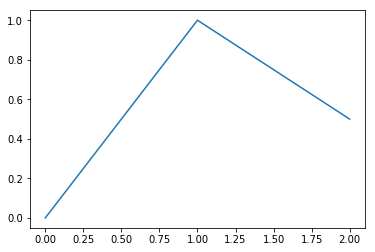

In [2]:
plot([0,1,0.5])

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

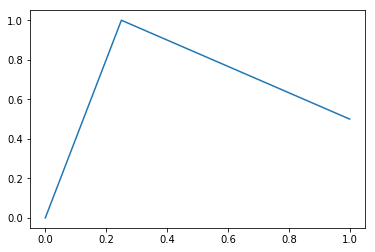

In [3]:
plot([0,0.25,1],[0,1,0.5])

`scatter` просто рисует точки, не соединяя из линиями.

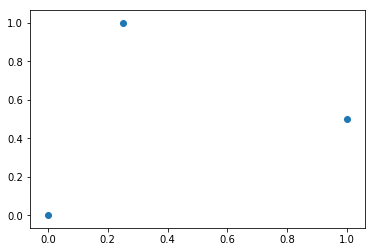

In [4]:
scatter([0,0.25,1],[0,1,0.5])

$x$ координаты не обязаны монотонно возрастать. Тут, например, мы строим замкнутый многоугольник.

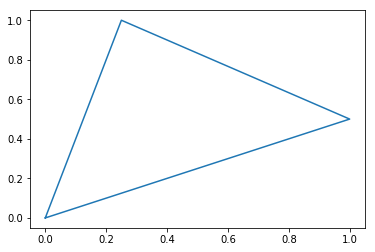

In [5]:
plot([0,0.25,1,0],[0,1,0.5,0])

Когда точек много, ломаная неотличима от гладкой кривой.

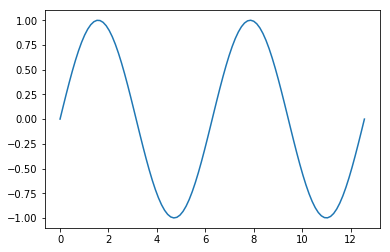

In [6]:
x=linspace(0,4*pi,100)
plot(x,sin(x))

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

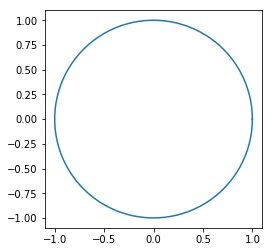

In [7]:
t=linspace(0,2*pi,100)
plot(cos(t),sin(t))
axes().set_aspect(1)

Чтобы окружности выглядели как окружности, а не как эллипсы, (а квадраты как квадраты, а не как прямоугольники), нужно установить aspect ratio, равный 1.

А вот одна из фигур Лиссажу, которые все мы любили смотреть на осциллографе.

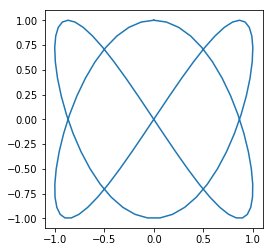

In [8]:
plot(sin(2*t),cos(3*t))
axes().set_aspect(1)

Несколько кривых на одном графике. Каждая задаётся парой массивов - $x$ и $y$ координаты. По умолчанию, им присваиваются цвета из некоторой последовательности цветов; разумеется, их можно изменить.

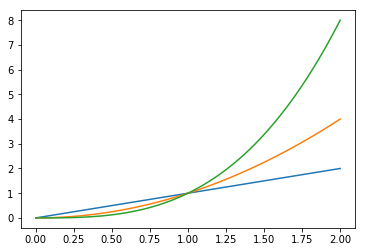

In [9]:
x=linspace(0,2,100)
plot(x,x,x,x**2,x,x**3)

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` - красный, `'b'` - синий и т.д.), дальше задаётся тип линии (`'-'` - сплошная, `'--'` - пунктирная, `'-.'` - штрих-пунктирная и т.д.).

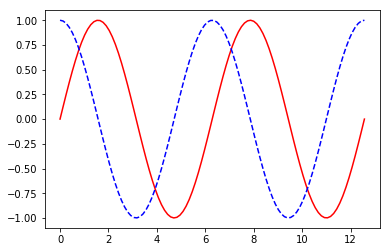

In [10]:
x=linspace(0,4*pi,100)
plot(x,sin(x),'r-',x,cos(x),'b--')

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

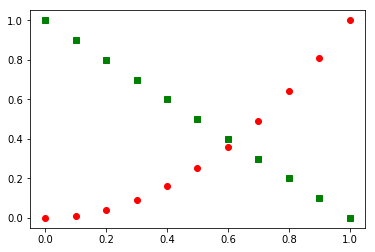

In [11]:
x=linspace(0,1,11)
plot(x,x**2,'ro',x,1-x,'gs')

Вот пример настройки почти всего, что можно настроить. Можно задать последовательность засечек на оси $x$ (и $y$) и подписи к ним (в них, как и в других текстах, можно использовать $\LaTeX$-овские обозначения). Задать подписи осей $x$ и $y$ и заголовок графика. Во всех текстовых элементах можно задать размер шрифта. Можно задать толщину линий и штрихи (так, на графике косинуса рисуется штрих длины 8, потом участок длины 4 не рисуется, потом участок длины 2 рисуется, потом участок длины 4 опять не рисуется, и так по циклу; поскольку толщина линии равна 2, эти короткие штрихи длины 2 фактически выглядят как точки). Можно задать подписи к кривым (legend); где разместить эти подписи тоже можно регулировать.

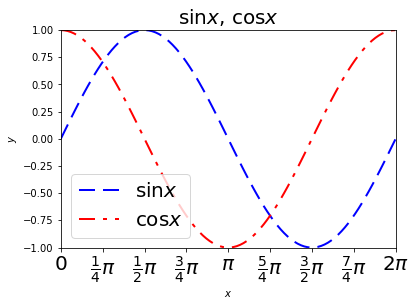

In [12]:
axis([0,2*pi,-1,1])
xticks(linspace(0,2*pi,9),
       ('0',r'$\frac{1}{4}\pi$',r'$\frac{1}{2}\pi$',
        r'$\frac{3}{4}\pi$',r'$\pi$',r'$\frac{5}{4}\pi$',
        r'$\frac{3}{2}\pi$',r'$\frac{7}{4}\pi$',r'$2\pi$'),
      fontsize=20)
xlabel(r'$x$')
ylabel(r'$y$')
title(r'$\sin x$, $\cos x$',fontsize=20)
x=linspace(0,2*pi,100)
plot(x,sin(x),linewidth=2,color='b',dashes=[8,4],
     label=r'$\sin x$')
plot(x,cos(x),linewidth=2,color='r',dashes=[8,4,2,4],
     label=r'$\cos x$')
legend(fontsize=20)

Если `linestyle=''`, то точки не соединяются линиями. Сами точки рисуются маркерами разных типов. Тип определяется строкой из одного символа, который чем-то похож на нужный маркер. В добавок к стандартным маркерам, можно определить самодельные.

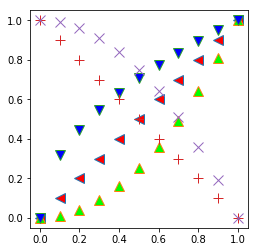

In [13]:
x=linspace(0,1,11)
axis([-0.05,1.05,-0.05,1.05])
axes().set_aspect(1)
plot(x,x,linestyle='',marker='<',markersize=10,
     markerfacecolor='#FF0000')
plot(x,x**2,linestyle='',marker='^',markersize=10,
     markerfacecolor='#00FF00')
plot(x,x**(1/2),linestyle='',marker='v',markersize=10,
     markerfacecolor='#0000FF')
plot(x,1-x,linestyle='',marker='+',markersize=10,
     markerfacecolor='#0F0F00')
plot(x,1-x**2,linestyle='',marker='x',markersize=10,
     markerfacecolor='#0F000F')

## Логарифмический масштаб

Если $y$ меняется на много порядков, то удобно использовать логарифмический масштаб по $y$.

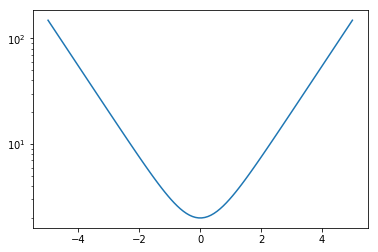

In [14]:
x=linspace(-5,5,100)
yscale('log')
plot(x,exp(x)+exp(-x))

Можно задать логарифмический масштаб по обоим осям.

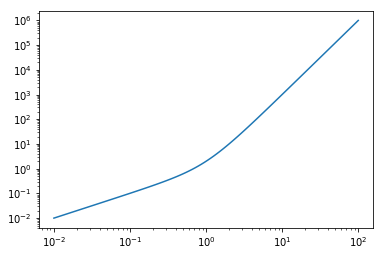

In [15]:
x=logspace(-2,2,100)
xscale('log')
yscale('log')
plot(x,x+x**3)

## Полярные координаты

Первый массив - $\varphi$, второй - $r$. Вот спираль.

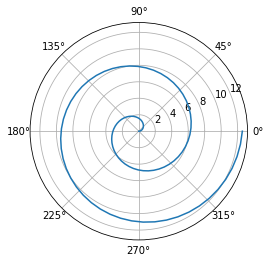

In [16]:
t=linspace(0,4*pi,100)
polar(t,t)

А это угловое распределение пионов в $e^+ e^-$ аннигиляции.

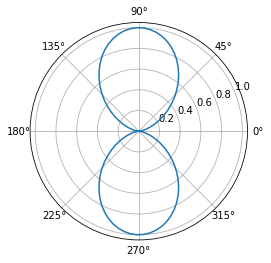

In [17]:
phi=linspace(0,2*pi,100)
polar(phi,sin(phi)**2)

## Экпериментальные данные

Допустим, имеется теоретическая кривая (резонанс без фона).

In [18]:
xt=linspace(-4,4,101)
yt=1/(xt**2+1)

Поскольку реальных экспериментальных данных под рукой нет, мы их сгенерируем. Пусть они согласуются с теорией, и все статистические ошибки равны 0.1.

In [19]:
xe=linspace(-3,3,21)
yerr=0.1*ones(21)
ye=1/(xe**2+1)+yerr*normal(size=21)

Экспериментальные точки с усами и теоретическая кривая на одном графике.

<Container object of 3 artists>

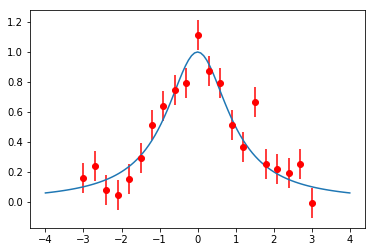

In [20]:
plot(xt,yt)
errorbar(xe,ye,fmt='ro',yerr=yerr)

## Гистограмма

Сгенерируем $N$ случайных чисел с нормальным (гауссовым) распределением (среднее 0, среднеквадратичное отклонение 1),
и раскидаем их по 20 бинам от $-3$ до $3$ (точки за пределами этого интервала отбрасываются). Для сравнения, вместе с гистограммой нарисуем Гауссову кривую в том же масштабе. И даже напишем формулу Гаусса.

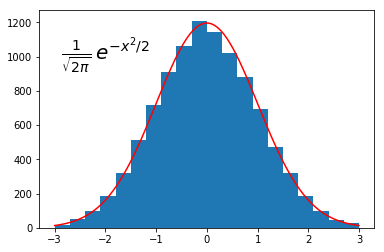

In [21]:
N=10000
r=normal(size=N)
n,bins,patches=hist(r,range=(-3,3),bins=20)
x=linspace(-3,3,100)
plot(x,N/sqrt(2*pi)*0.3*exp(-0.5*x**2),'r')
text(-2,1000,r'$\frac{1}{\sqrt{2\pi}}\,e^{-x^2/2}$',
     fontsize=20,horizontalalignment='center',
     verticalalignment='center')

## Контурные графики

Пусть мы хотим изучить поверхность $z=xy$. Вот её горизонтали.

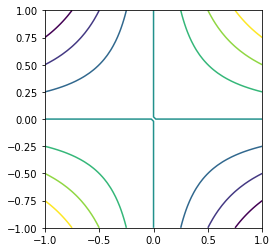

In [22]:
x=linspace(-1,1,50)
y=x
z=outer(x,y)
contour(x,y,z)
axes().set_aspect(1)

Что-то их маловато. Сделаем побольше и подпишем.

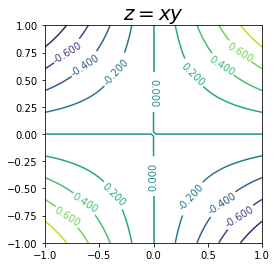

In [23]:
title(r'$z=xy$',fontsize=20)
curves=contour(x,y,z,linspace(-1,1,11))
clabel(curves)
axes().set_aspect(1)

А здесь высота даётся цветом, как на физических географических картах. `colorbar` показывает соответствие цветов и значений $z$.

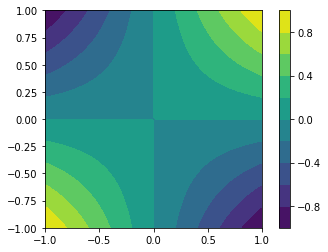

In [24]:
contourf(x,y,z,linspace(-1,1,11))
colorbar()
axes().set_aspect(1)

## Images (пиксельные картинки)

Картинка задаётся массивом `z`: `z[i,j]` - это цвет пикселя `i,j`, массив из 3 элементов (`rgb`, числа от 0 до 1).

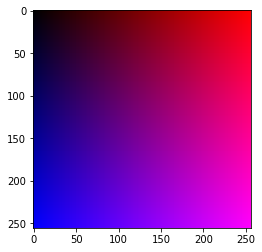

In [25]:
n=256
u=linspace(0,1,n)
x,y=meshgrid(u,u)
z=zeros((n,n,3))
z[:,:,0]=x
z[:,:,2]=y
imshow(z)

## Трёхмерная линия

Задаётся параметрически: $x=x(t)$, $y=y(t)$, $z=z(t)$.

In [26]:
t=linspace(0,4*pi,100)
x=cos(t)
y=sin(t)
z=t/(4*pi)

Тут нужен объект класса `Axes3D` из пакета `mpl_toolkits.mplot3d`. `figure()` - это текущий рисунок, создаём в нём объект `ax`, потом используем его методы.

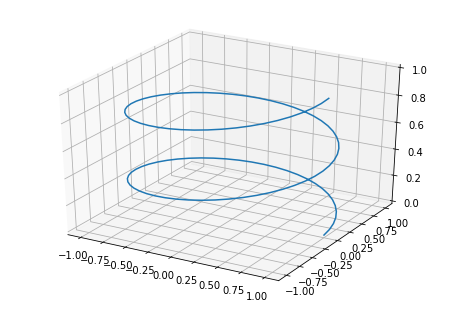

In [27]:
fig=figure()
ax=Axes3D(fig)
ax.plot(x,y,z)

К сожалению, inline трёхмерную картинку нельзя вертеть мышкой (это можно делать с трёхмерными картинками в отдельных окнах). Но можно задать, с какой стороны мы смотрим.

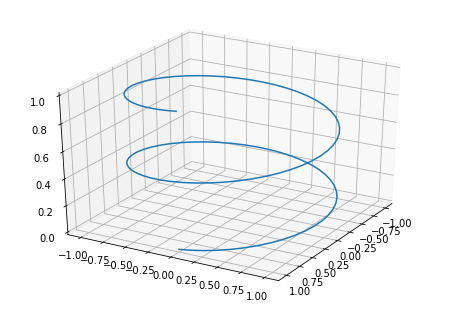

In [28]:
fig=figure()
ax=Axes3D(fig)
ax.elev,ax.azim=30,30
ax.plot(x,y,z)

## Поверхности

Все поверхности параметрические: $x=x(u,v)$, $y=y(u,v)$, $z=z(u,v)$. Если мы хотим построить явную поверхность $z=z(x,y)$, то удобно создать массивы $x=u$ и $y=v$ функцией `meshgrid`.

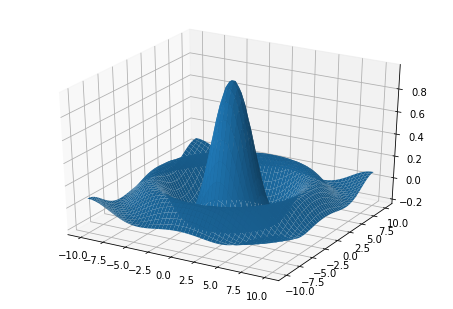

In [29]:
X=10
N=50
u=linspace(-X,X,N)
x,y=meshgrid(u,u)
r=sqrt(x**2+y**2)
z=sin(r)/r
fig=figure()
ax=Axes3D(fig)
ax.plot_surface(x,y,z,rstride=1,cstride=1)

Есть много встроенных способов раскраски поверхностей. Так, в методе `gnuplot` цвет зависит от высоты $z$.

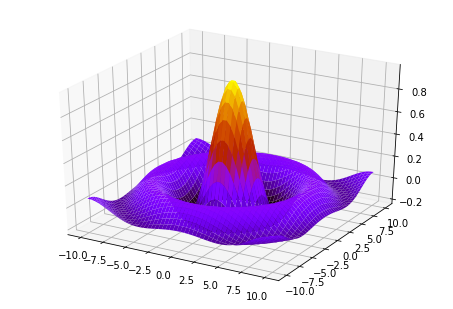

In [30]:
fig=figure()
ax=Axes3D(fig)
ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='gnuplot')

Построим бублик - параметрическую поверхность с параметрами $\vartheta$, $\varphi$.

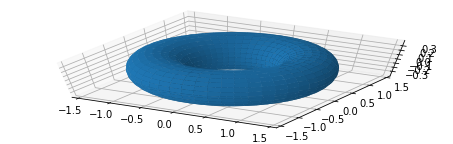

In [31]:
t=linspace(0,2*pi,50)
th,ph=meshgrid(t,t)
r=0.4
x,y,z=(1+r*cos(ph))*cos(th),(1+r*cos(ph))*sin(th),r*sin(ph)
fig=figure()
ax=Axes3D(fig)
ax.elev=60
ax.set_aspect(r/(1+r))
ax.plot_surface(x,y,z,rstride=2,cstride=1)